In [1]:
import pandas as pd
df_claim=pd.read_csv("https://raw.githubusercontent.com/ind-kum/Datasets/master/Auto_Insurance_Claims_Sample.csv")
df_claim

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [2]:
#Lets check the null values in the dataset
df_claim.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [3]:
#Lets chcek the datatypes of the column
df_claim.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [4]:
#Lets chcek the value counts
for col in df_claim.columns:
    if df_claim[col].dtype=="object":
        print(df_claim[col].value_counts())
        print()
#We see no customer is repeated so each customer is only availabe once in the dataset
#All instances are for one country US so we can drop this column as it is constant having no variance
#We can drop one of the column from "State Code" and "State" as both show same info
#Also we observe all the claims info are for single year

MY97912    1
LK51620    1
OG84541    1
XB71208    1
XS47087    1
          ..
YA37626    1
NZ19529    1
UE75424    1
BL44708    1
GH54524    1
Name: Customer, Length: 9134, dtype: int64

US    9134
Name: Country, dtype: int64

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

No     7826
Yes    1308
Name: Response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
2/27/11    167
1/5/11     167
1/11/11    166
2/4/11     164
2/28/11    161
2/10/11 

In [5]:
df_claim.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
#As discussed above some of the columns can be dropped
df_claim.drop(columns=["Customer","Country","State Code","Effective To Date"],inplace=True)

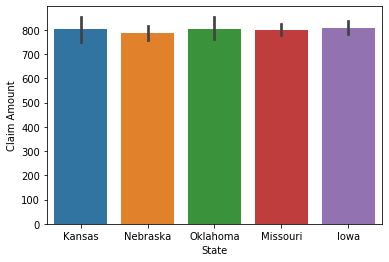

In [7]:
#Lets do the some graphical EDA
#what is the average claim amount from each states
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="State",y="Claim Amount",data=df_claim)
plt.show()

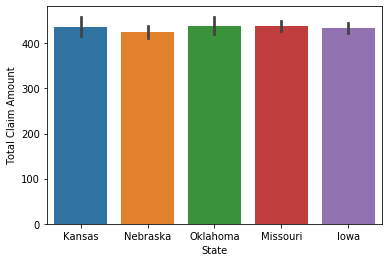

In [8]:
#Lets chcek the total claim amount
sns.barplot(x="State",y="Total Claim Amount",data=df_claim)
plt.show()
#we see average total claim amount in each state is less than claim amount in each state

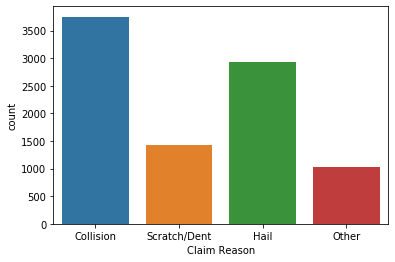

In [9]:
#Lets check the count of claim reasons
sns.countplot(x="Claim Reason",data=df_claim)
plt.show()
#Most of the claim reasons are of type "Collision"

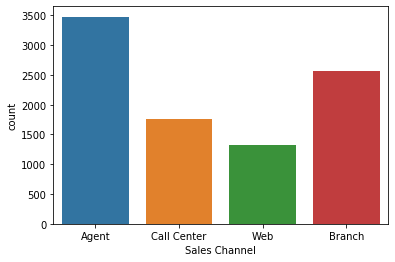

In [10]:
#Through which channel claims were more
sns.countplot(x="Sales Channel",data=df_claim)
plt.show()
#people genrally prefer opting for agent

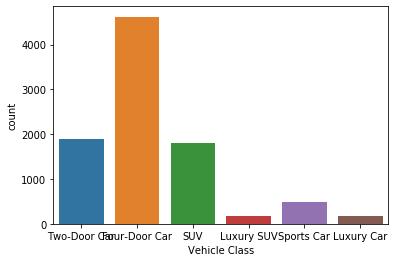

In [11]:
#lets check the vehicle class
sns.countplot(x="Vehicle Class",data=df_claim)
plt.show()
#insurance is mainly claimed for "four door car"

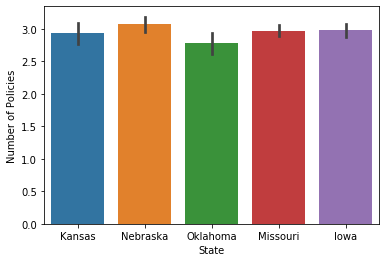

In [12]:
#which state is having on an averge more number of policies
sns.barplot(x="State",y="Number of Policies",data=df_claim)
plt.show()

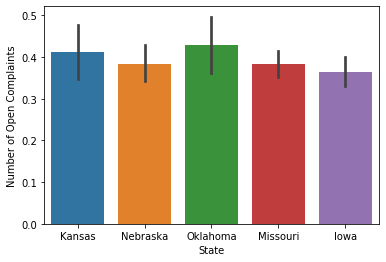

In [13]:
#Which state on an averge has more open complaints
sns.barplot(x="State",y="Number of Open Complaints",data=df_claim)
plt.show()
#so each state has less than 1 complaint on an averge pending

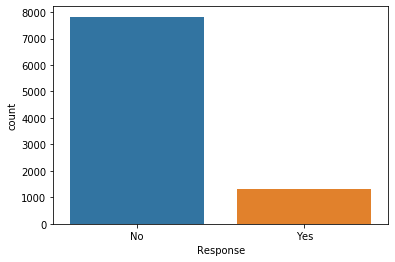

In [14]:
#lets chcek the responses
sns.countplot(x="Response",data=df_claim)
plt.show()
#The amounnt of customers with no response is quite high

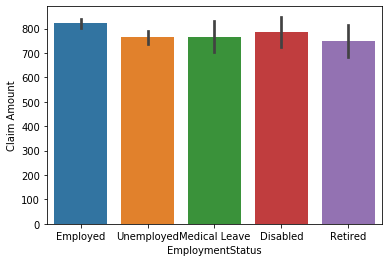

In [15]:
#lets chcek the average claim amount based on employment status
sns.barplot(x="EmploymentStatus",y="Claim Amount",data=df_claim)
plt.show()

In [16]:
#Lets check the correlation matrix
df_claim.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [17]:
#Lets get the list of categorical_features
cate_feat_list=list()
for col in df_claim.columns:
    if df_claim[col].dtype=="object":
        cate_feat_list.append(col)

In [18]:
#using labelencoder to convert all the object type columns to int
from sklearn.preprocessing import LabelEncoder
for col in df_claim.columns:
    if df_claim[col].dtype=="object":
        df_claim[col]=LabelEncoder().fit_transform(df_claim[col])

In [19]:
#Lets divide the dataset into input and output
df_x=df_claim.drop(columns=["Claim Amount"])
y=df_claim[["Claim Amount"]]

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [21]:
#lets make a function which evaluates the model using cross_val_score for models accept lgbm
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [22]:
#Lets use decision tree
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,df_x,np.log1p(y))
#We can see this model is not performing well

r2 score corresponding to  42  is  0.833996753214354
r2 score corresponding to  43  is  0.8512493742253536
r2 score corresponding to  44  is  0.8213566933383311
r2 score corresponding to  45  is  0.8343238541994138
r2 score corresponding to  46  is  0.8417605474885922
r2 score corresponding to  47  is  0.8386522827674745
r2 score corresponding to  48  is  0.8403267437533074
r2 score corresponding to  49  is  0.8296120267054744
r2 score corresponding to  50  is  0.8441254227274271
r2 score corresponding to  51  is  0.806080332394858
r2 score corresponding to  52  is  0.809262249897265
r2 score corresponding to  53  is  0.810054429832674
r2 score corresponding to  54  is  0.8296589526839395
r2 score corresponding to  55  is  0.8546327694677349
r2 score corresponding to  56  is  0.8275329937950887
r2 score corresponding to  57  is  0.831895651241612
r2 score corresponding to  58  is  0.8444701582752229
r2 score corresponding to  59  is  0.8287643820971478
r2 score corresponding to  60  is

In [23]:
#lets use random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5)
clf.fit(df_x, np.log1p(y))
clf.best_params_

{'n_estimators': 500}

In [24]:
#Lets use maxr2_score function
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,df_x,np.log1p(y))
#Below scores are better than what we saw with decision tree but random fores is some what slow

r2 score corresponding to  42  is  0.9110832821534249
r2 score corresponding to  43  is  0.9174152159530797
r2 score corresponding to  44  is  0.9052235865840452
r2 score corresponding to  45  is  0.9143492271247725
r2 score corresponding to  46  is  0.9078391240614101
r2 score corresponding to  47  is  0.9168898475102809
r2 score corresponding to  48  is  0.914837250067469
r2 score corresponding to  49  is  0.9118528858343652
r2 score corresponding to  50  is  0.909961550920827
r2 score corresponding to  51  is  0.9033622165296404
r2 score corresponding to  52  is  0.9035948202070823
r2 score corresponding to  53  is  0.9031886613047778
r2 score corresponding to  54  is  0.9069028881470357
r2 score corresponding to  55  is  0.9145238144971284
r2 score corresponding to  56  is  0.9073518342936174
r2 score corresponding to  57  is  0.9100189348275948
r2 score corresponding to  58  is  0.9121347701417652
r2 score corresponding to  59  is  0.909692215797547
r2 score corresponding to  60  

In [25]:
#Lets find meean r2 score using cross_val score function
cross_val_score(rfr,df_x,np.log1p(y),cv=10,scoring="r2").mean()
#Here mean r2 score is better than random forest regressor

0.9113427788836745

In [26]:
#Lets use KNN regressor and save it as our final model
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.25)
y_train=np.log1p(y_train)

In [27]:
rfr=RandomForestRegressor(n_estimators=500)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [28]:
#Lets find the rmse and r2_score using sklearn.metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,np.expm1(y_pred))))
print("r2_score is: ",r2_score(y_test,np.expm1(y_pred)))

RMSE is:  339.4255456330527
r2_score is:  0.7354802453258606


In [29]:
#lets chcek cross val score for random forest
print("RANDOM FORSET\n\n")
model_evaluation(rfr,df_x,y)

RANDOM FORSET


Mean r2 score for regressor:  0.7017314728504459
standard deviation in r2 score for regressor:  0.008348139284508447
[0.69811413 0.71607698 0.69687493 0.70545729 0.69213404]
